A)


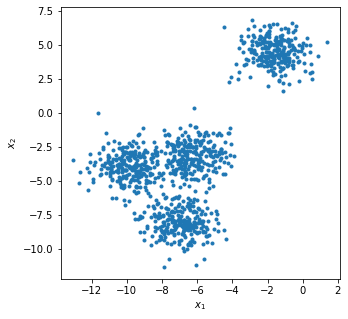

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

N = 1000
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
x, y = make_blobs(n_samples=N, n_features=2, centers=4, cluster_std=1,
center_box=(-10.0, 10.0), shuffle=True, random_state=1)

print('A)')
fig = plt.figure(figsize=(5,5))
plt.plot(x[:,0],x[:,1], '.')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [42]:
print('B) Após inspecionar a figura, eu acho que devem ser utilizados 4 clusters com algoritmo do k-Means.')

B) Após inspecionar a figura, eu acho que devem ser utilizados 4 clusters com algoritmo do k-Means.


In [43]:
# calculating the within clusters sum-of-squares for 19 cluster amounts
sum_of_squares = calculate_wcss(x)
    
# calculating the optimal number of clusters
n = optimal_number_of_clusters(sum_of_squares)
print('C) O valor mais apropriado para k segundo o método do cotovelo é ' + str(n) + '\n')
    
# running kmeans to our optimal number of clusters
km = KMeans(n_clusters=n)
km.fit_predict(x)

c = np.zeros((n,2))
for i in range(0,n):
    c[i,0] = km.cluster_centers_[i][0]
    c[i,1] = km.cluster_centers_[i][1]    
    print('Centroid %d: (%1.2f, %1.2f)' % (i,km.cluster_centers_[i][0],km.cluster_centers_[i][1]))

C) O valor mais apropriado para k segundo o método do cotovelo é 4

Centroid 0: (-1.61, 4.46)
Centroid 1: (-9.90, -3.93)
Centroid 2: (-6.98, -8.10)
Centroid 3: (-6.21, -3.15)


D)


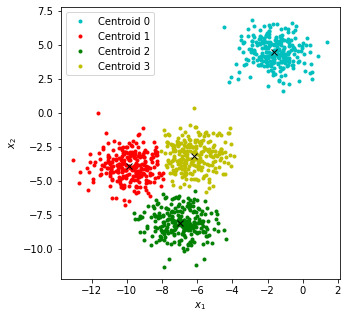

In [44]:
matrix_new = np.zeros((x.shape[0],c.shape[0]))
for i in range(c.shape[0]):
    for k in range(x.shape[0]):
        dist = 0
        for l in range(x.shape[1]):
            dist = dist + (x[k,l] - c[i,l])**2
        matrix_new[k,i] = np.sqrt(dist)

#recalculate the centroids
index = np.zeros((x.shape[0],1))
for i in range(x.shape[0]):
    q = np.argmin(matrix_new[i,:])
    index[i,0] = q

print('D)')
idx0 = np.argwhere(index == 0)
idx1 = np.argwhere(index == 1)
idx2 = np.argwhere(index == 2)
idx3 = np.argwhere(index == 3)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0[:,0],0], x[idx0[:,0],1], 'c.', label='Centroid 0')
plt.plot(x[idx1[:,0],0], x[idx1[:,0],1], 'r.', label='Centroid 1')
plt.plot(x[idx2[:,0],0], x[idx2[:,0],1], 'g.', label='Centroid 2')
plt.plot(x[idx3[:,0],0], x[idx3[:,0],1], 'y.', label='Centroid 3')
plt.plot(c[0,0],c[0,1], 'kx')
plt.plot(c[1,0],c[1,1], 'kx')
plt.plot(c[2,0],c[2,1], 'kx')
plt.plot(c[3,0],c[3,1], 'kx')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('distribution_of_centroid', dpi=600)
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

km = KMeans(n_clusters = np.argmax(sil)+2)
print('E) O valor mais apropriado para k segundo o método do silhouette é ' + str(np.argmax(sil)+2) + '\n')
km.fit_predict(x)

c = np.zeros((np.argmax(sil)+2,2))
for i in range(0,np.argmax(sil)+2):
    c[i,0] = km.cluster_centers_[i][0]
    c[i,1] = km.cluster_centers_[i][1]    
    print('Centroid %d: (%1.2f, %1.2f)' % (i,km.cluster_centers_[i][0],km.cluster_centers_[i][1]))

E) O valor mais apropriado para k segundo o método do silhouette é 2

Centroid 0: (-7.74, -5.05)
Centroid 1: (-1.61, 4.46)


F)


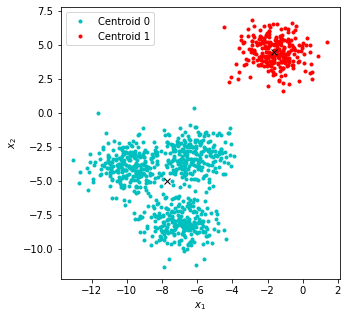

In [46]:
matrix_new = np.zeros((x.shape[0],c.shape[0]))
for i in range(c.shape[0]):
    for k in range(x.shape[0]):
        dist = 0
        for l in range(x.shape[1]):
            dist = dist + (x[k,l] - c[i,l])**2
        matrix_new[k,i] = np.sqrt(dist)

#recalculate the centroids
index = np.zeros((x.shape[0],1))
for i in range(x.shape[0]):
    q = np.argmin(matrix_new[i,:])
    index[i,0] = q

print('F)')
idx0 = np.argwhere(index == 0)
idx1 = np.argwhere(index == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0[:,0],0], x[idx0[:,0],1], 'c.', label='Centroid 0')
plt.plot(x[idx1[:,0],0], x[idx1[:,0],1], 'r.', label='Centroid 1')
plt.plot(c[0,0],c[0,1], 'kx')
plt.plot(c[1,0],c[1,1], 'kx')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('distribution_of_centroid', dpi=600)
plt.show()